### week 3

# Linear Algebra and Linear Regression

### written by Neil Lawrence (2015), with some modification by YG (2017)

### Sum of Squares Error

Last week we considered a cost function for minimization of the error. We considered items (films) and users and assumed that each movie rating $y_{i,j}$ could be summarised by an inner product between a vector associated with the item $\mathbf{v}_j$ and one associated with the user $\mathbf{u}_i$. We justified the inner product as a measure of similarity in the space of 'movie subjects', where both the users and the items lived, giving the analogy of a library.

To make predictions we encouraged the similarity to be high if the movie rating was high using the quadratic error function,
$$
  E_{i,j}(\mathbf{u}_i,\mathbf{v}_j) = (\mathbf{u}_i^\top \mathbf{v}_j - y_{i,j})^2
$$
which we then summed across all the observations to form the total error
$$
  E(\mathbf{U},\mathbf{V}) = \sum_{i,j} s_{i,j} (\mathbf{u}_i^\top \mathbf{v}_j - y_{i,j})^2
$$
where $s_{i,j}$ is an indicator variable which is set to 1 if the rating of movie $j$ by user $i$ is provided in our data set.

This is known as a sum of squares error. Minimizing it was first proposed by [Legendre](http://en.wikipedia.org/wiki/Adrien-Marie_Legendre) in 1805. His book, which was on the orbit of comets, is available on google books, we can take a look at the relevant page by calling the code below.

In [1]:
import pods
pods.notebook.display_google_book(id='spcAAAAAMAAJ', page=72) 

Of course, the main text is in French, but the key part we are interested in can be roughly translated as

"In most matters where we take measures data through observation, the most accurate results they can offer, it is almost always leads to a system of equations of the form
$$
  E = a + bx + cy + fz + etc
$$
where $a$, $b$, $c$, $f$ etc are the known coefficients and $x$, $y$, $z$ etc are unknown and must be determined by the condition that the value of $E$ is reduced, for each equation, to an amount or zero or very small."

He continues

"Of all the principles that we can offer for this item, I think it is not broader, more accurate, nor easier than the one we have used in previous research application, and that is to make the minimum sum of the squares of the errors. By this means, it is between the errors a kind of balance that prevents extreme to prevail, is very specific to make known the state of the closest to the truth system. The sum of the squares of the errors $E^2 + \left.E^\prime\right.^2 + \left.E^{\prime\prime}\right.^2 + etc$ being
\begin{align*}
    & (a + bx + cy + fz + etc)^2 \\
  + & (a^\prime + b^\prime x + c^\prime y + f^\prime z + etc)^2 \\
  + & (a^{\prime\prime} + b^{\prime\prime} x + c^{\prime\prime} y + f^{\prime\prime}z + etc)^2 \\
  + & etc
\end{align*}
if we wanted a minimum, by varying x alone, we will have the equation ..."

This is the earliest known printed version of the problem of least squares. The notation, however, is a little awkward for mordern eyes. In particular Legendre doesn't make use of the sum sign,
$$
  \sum_{i=1}^3 z_i = z_1 + z_2 + z_3
$$
nor does he make use of the inner product.

In our notation, if we were to do linear regression, we would need to subsititue:
\begin{align*}
  a & \leftarrow y_1-c \\
  a^\prime & \leftarrow y_2-c \\
  a^{\prime\prime} & \leftarrow y_3 -c \qquad etc
\end{align*}
to introduce the data observations $\{y_i\}_{i=1}^{n}$ alongside $c$, the offset. We would then introduce the input locations
\begin{align*}
  b & \leftarrow x_1 \\
  b^\prime & \leftarrow x_2 \\
  b^{\prime\prime} & \leftarrow x_3 \qquad etc
\end{align*}
and finally the gradient of the function
$$
  x \leftarrow -m
$$
The remaining coefficients ($c$ and $f$) would then be zero. That would give us
\begin{align*}
  & (y_1 - (mx_1+c))^2 \\
  + & (y_2 -(mx_2 + c))^2 \\
  + & (y_3 -(mx_3 + c))^2 \\
  + & etc
\end{align*}
which we would write in the modern notation for sums as
$$
  \sum_{i=1}^n (y_i - (mx_i + c))^2
$$
which is recognised as the sum of squares error for a linear regression.

This shows the advantage of modern [summation operator](http://en.wikipedia.org/wiki/Summation), $\sum$, in keeping our mathematical notation compact. Whilst it may look more complicated the first time you see it, understanding the mathematical rules that go around it, allows us to go much further with the notation.

Inner products (or [dot products](http://en.wikipedia.org/wiki/Dot_product)) are similar. They allow us to write
$$
  \sum_{i=1}^q u_i v_i
$$
in a more compact notation, $\mathbf{u}^\top \cdot \mathbf{v}$ .
Here we are using bold face to represent vectors, and we assume that the individual elements of a vector $\mathbf{z}$ are given as a series of scalars
$$
  \mathbf{z} = \begin{bmatrix} z_1 \\ \vdots \\ z_n \end{bmatrix}
$$
which are each indexed by their position in the vector.

### Linear Algebra

Linear algebra provides a very similar role, when we introduce [linear algebra](http://en.wikipedia.org/wiki/Linear_algebra), it is because we are faced with a large number of addition and multiplication operations. These operations need to be done together and would be very tedious to write down as a group. So the first reason we reach for linear algebra is for a more compact representation of our mathematical formulae.

### Example: Olympic Marathons

Now we will load in the Olympic marathon data. This is data of times for the men's marathon from the first olympics in 1896 up until the London 2012 olympics.

In [2]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

You can see what these values are by typing:

In [3]:
print(x)
print(y)

[[ 1896.]
 [ 1900.]
 [ 1904.]
 [ 1908.]
 [ 1912.]
 [ 1920.]
 [ 1924.]
 [ 1928.]
 [ 1932.]
 [ 1936.]
 [ 1948.]
 [ 1952.]
 [ 1956.]
 [ 1960.]
 [ 1964.]
 [ 1968.]
 [ 1972.]
 [ 1976.]
 [ 1980.]
 [ 1984.]
 [ 1988.]
 [ 1992.]
 [ 1996.]
 [ 2000.]
 [ 2004.]
 [ 2008.]
 [ 2012.]]
[[ 4.47083333]
 [ 4.46472926]
 [ 5.22208333]
 [ 4.15467867]
 [ 3.90331675]
 [ 3.56951267]
 [ 3.82454477]
 [ 3.62483707]
 [ 3.59284275]
 [ 3.53880792]
 [ 3.67010309]
 [ 3.39029111]
 [ 3.43642612]
 [ 3.20583007]
 [ 3.13275665]
 [ 3.32819844]
 [ 3.13583758]
 [ 3.0789588 ]
 [ 3.10581822]
 [ 3.06552909]
 [ 3.09357349]
 [ 3.16111704]
 [ 3.14255244]
 [ 3.08527867]
 [ 3.10265829]
 [ 2.99877553]
 [ 3.03392977]]


Note that they are not `pandas` data frames for this example, they are just arrays of dimensionality $n\times 1$, where $n$ is the number of data.

The aim of this lab is to have you coding linear regression in python. We will do it in two ways, once using iterative updates (coordinate ascent) and then using linear algebra. The linear algebra approach will not only work much better, it is easy to extend to multiple input linear regression and *non-linear* regression using basis functions.

### Plotting the Data

You can make a plot of $y$ vs $x$ with the following command:

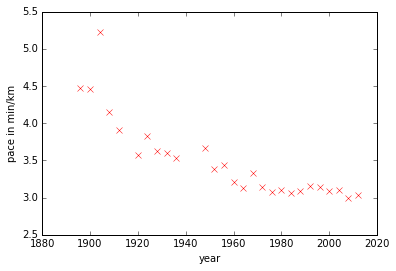

In [4]:
%matplotlib inline 
import pylab as plt

plt.plot(x, y, 'rx')
plt.xlabel('year')
plt.ylabel('pace in min/km')

### Maximum Likelihood: Iterative Solution

Now we will take the maximum likelihood approach we derived in the lecture to fit a line, $y_i = mx_i + c$, to the data you've plotted. We are trying to minimize the error function:
$$
  E(m, c) = \sum_{i=1}^n (y_i - mx_i - c)^2
$$
with respect to $m$, $c$ and $\sigma^2$.

We can start with an initial guess for $m$, then we use the maximum likelihood update to find an estimate for the offset $c$.

In [5]:
m = -0.4
c = 80

### Coordinate Descent

In the movie recommender system example, we minimised the objective function by gradient (steepest) descent based gradient methods. Our updates required us to compute the gradient at the position we were located, then to update the gradient according to the direction of steepest descent. This time, we will take another approach. It is known as [**coordinate descent**](https://en.wikipedia.org/wiki/Coordinate_descent). In coordinate descent, we choose to move one parameter at a time. Ideally, we design an algorithm that at each step moves the parameter to its minimum value. At each step we choose to move the individual parameter to its minimum.

To find the minimum, we look for the point in the curve where the gradient is zero. This can be found by taking the gradient of $E(m,c)$ with respect to the parameter.

#### Update for Offset

Let's consider the parameter $c$ first. The gradient goes nicely through the summation operator, and we obtain
$$
  \frac{\partial E(m,c)}{\partial c} = -\sum_{i=1}^n 2(y_i - mx_i - c)
$$
Now we want the point that is a minimum. A minimum is an example of a [*stationary point*](http://en.wikipedia.org/wiki/Stationary_point), the stationary points are those points of the function where the gradient is zero. They are found by solving the equation for $\frac{\partial E(m,c)}{\partial c} = 0$. Substituting in to our gradient, we can obtain the following equation, 
$$
  0 = -\sum_{i=1}^n 2(y_i - mx_i - c)
$$
which can be reorganised as follows,
$$
  c^* = \frac{\sum_{i=1}^n (y_i - m^* x_i)}{n}
$$
The fact that the stationary point is easily extracted in this manner implies that the solution is *unique*. There is only one stationary point for this system. Traditionally when trying to determine the type of stationary point we have encountered we now compute the *second derivative*,
$$
  \frac{\partial^2 E(m,c)}{\partial c^2} = 2n
$$
The second derivative is positive, which in turn implies that we have found a minimum of the function. This means that setting $c$ in this way will take us to the lowest point along that axes.

In [6]:
# set c to the minimum
c = (y - m*x).mean()
print(c)

786.019771145


#### Update for Slope

Now we have the offset set to the minimum value, in coordinate descent, the next step is to optimise another parameter. Only one further parameter remains. That is the slope of the system.

Now we can turn our attention to the slope. We once again perform the same set of computations to find the minima. We end up with an update equation of the following form.
$$
  m^* = \frac{\sum_{i=1}^n (y_i - c)x_i}{\sum_{i=1}^n x_i^2}
$$
The next thing we are going to do is a little differentiation practice.

### Assignment Question 1

Derive the the gradient of the objective function with respect to the slope, $m$. Rearrange it to show that the update equation written above does find the stationary points of the objective function. By computing its derivative show that it's a minimum.

*10 marks*

#### Question 1 Answer

Given $E$, derive the gradient of the objective function with respect to the slope, $m$,

$$
  E(m, c) = \sum_{i=1}^n (y_i - mx_i - c)^2
$$

Find the minimum,

$$
  0 = \frac{\partial E(m,c)}{\partial m} = -\sum_{i=1}^n 2x_i(y_i - mx_i - c)
$$

which can be reorganised as follows,
$$
  m^* = \frac{\sum_{i=1}^n (y_i - c) x_i}{\sum_{i=1}^n x_i^2}
$$

Next, get the double derivative

$$
  \frac{\partial^2 E(m,c)}{\partial m^2} = \sum_{i=1}^n 2x_i^2
$$

The second derivative is positive, which in turn implies that we have found a minimum of the function.

In [7]:
m = ((y - c)*x).sum()/(x**2).sum()
print(m)

-0.3998724073


We can have a look at how good our fit is by computing the prediction across the input space. First create a vector of 'test points',

In [8]:
import numpy as np

x_test = np.linspace(1890, 2020, 130)[:, None]

Now use this vector to compute some test predictions,

In [9]:
f_test = m*x_test + c

Now plot those test predictions with a blue line on the same plot as the data,

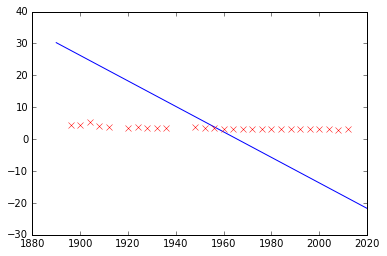

In [10]:
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

The fit isn't very good, we need to iterate between these parameter updates in a loop to improve the fit, we have to do this several times,

In [11]:
for i in np.arange(10):
    m = ((y - c)*x).sum()/(x*x).sum()
    c = (y-m*x).sum()/y.shape[0]
print(m)
print(c)

-0.398725964251
783.527379727


And let's try plotting the result again,

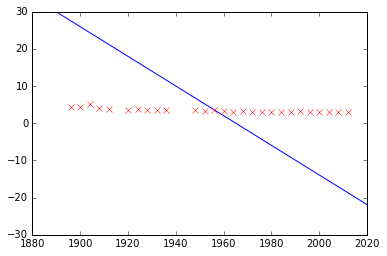

In [12]:
f_test = m*x_test + c
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

Clearly we need more iterations than 10! In the next question you will add more iterations and report on the error as optimisation proceeds.

### Assignment Question 2

There is a problem here, we seem to need many interations to get to a good solution. Let's explore what's going on. Write code which alternates between updates of `c` and `m`. Include the following features in your code.

(a) Initialise with `m = -0.4` and `c = 80`.
(b) Every 10 iterations compute the value of the objective function for the training data and print it to the screen (you'll find hints on this in the lab from last week.
(c) Cause the code to stop running when the error change over less than 10 iterations is smaller than $1\times10^{-4}$. This is known as a stopping criterion.

Why do we need so many iterations to get to the solution?

*10 marks*

In [13]:
# Question 2 Answer Code

# initialise 
m = -0.4
c = 80

In [14]:
# iterate the value of the objective function and print it out
def compute_value(m, c, x, y):
    for i in np.arange(10):
        m = ((y - c)*x).sum()/(x*x).sum()
        c = (y-m*x).sum()/y.shape[0]
    return m, c

# E(m,c) = sum((y - m x - c)^2)    
def objective_function(m, c, x, y):
    obj = 0.
    for i in range(len(x)):
        prediction = m * x[i] - c # m x - c
        diff = -y[i] + prediction  # y - m x - c
        obj += diff*diff # diff^2
    return obj



('m = ', -0.038932157701863868, ', c = ', 79.664088545820306, ', objective function = ', array([ 685432.5670297]), 'error change  = ', array([ 2888.5122132]))
('m = ', -0.038846727474039083, ', c = ', 79.496961707534922, ', objective function = ', array([ 682559.60719969]), 'error change  = ', array([ 2872.95983002]))
('m = ', -0.038761578475469863, ', c = ', 79.330385037000624, ', objective function = ', array([ 679702.10883086]), 'error change  = ', array([ 2857.49836883]))
('m = ', -0.038676709780372742, ', c = ', 79.164356723110615, ', objective function = ', array([ 676859.98156165]), 'error change  = ', array([ 2842.12726921]))
('m = ', -0.038592120466011834, ', c = ', 78.99887496072013, ', objective function = ', array([ 674033.13558734]), 'error change  = ', array([ 2826.84597431]))
('m = ', -0.038507809612688841, ', c = ', 78.833937950626776, ', objective function = ', array([ 671221.48165654]), 'error change  = ', array([ 2811.6539308]))
('m = ', -0.038423776303733011, ', c =

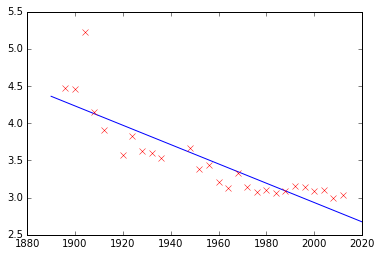

In [66]:
# print out objective function and continue to run until error change is < 1*10^-4
m, c = compute_value(m, c, x, y)
error_previous = objective_function(m, c, x, y)
error = 1000
while(1) :
    if (error < 1e-4):
        break
    m, c = compute_value(m, c, x, y)
    error_new = objective_function(m, c, x, y)
    error = error_previous - error_new 
    print("m = ", m, ", c = ", c, ", objective function = ", error_new, "error change  = ", error)
    error_previous = error_new
f_test = m*x_test + c
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

('m = ', -0.012980650226125571, ', c = ', 28.895250587727826, ', objective function = ', array([ 90175.01468875]), 'error change  = ', array([  9.99992481e-05]))


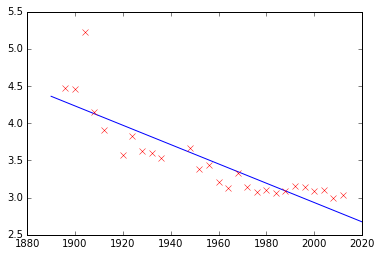

In [67]:
# results
print("m = ", m, ", c = ", c, ", objective function = ", error_new, "error change  = ", error)
f_test = m*x_test + c
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

#### Question 2 Answer Text

I believe we need more iterations to reach this solution is because we have a small sample size. With a small sample size, the c and m value will update at a slow rate. This will require the best fit to have many iterations before having a suitable line. 

### Multiple Input Solution with Linear Algebra

You've now seen how slow it can be to perform a coordinate ascent on a system. Another approach to solving the system (which is not always possible, particularly in *non-linear* systems) is to go direct to the minimum. To do this we need to introduce *linear algebra*. We will represent all our errors and functions in the form of linear algebra.

As we mentioned above, linear algebra is just a shorthand for performing lots of multiplications and additions simultaneously. What does it have to do with our system then? Well the first thing to note is that the linear function we were trying to fit has the following form:
$$
  f(x) = mx + c
$$
the classical form for a straight line. From a linear algebraic perspective we are looking for multiplications and additions. We are also looking to separate our parameters from our data. The data is the *givens* remember, in French the word is données literally translated means *givens* that's great, because we don't need to change the data, what we need to change are the parameters (or variables) of the model. In this function the data comes in through $x$, and the parameters are $m$ and $c$.

What we'd like to create is a vector of parameters and a vector of data. Then we could represent the system with vectors that represent the data, and vectors that represent the parameters.

We look to turn the multiplications and additions into a linear algebraic form, we have one multiplication ($m\times c$ and one addition ($mx + c$). But we can turn this into a inner product by writing it in the following way,
$$
  f(x) = m \times x + c \times 1
$$
in other words we've extracted the unit value, from the offset, $c$. We can think of this unit value like an extra item of data, because it is always given to us, and it is always set to 1 (unlike regular data, which is likely to vary!). We can therefore write each input data location, $\mathbf{x}$, as a vector
$$
  \mathbf{x} = \begin{bmatrix} 1 \\ x \end{bmatrix}
$$

Now we choose to also turn our parameters into a vector. The parameter vector will be defined to contain
$$
  \mathbf{w} = \begin{bmatrix} c \\ m \end{bmatrix}
$$
because if we now take the inner product between these to vectors we recover
$$
  \mathbf{x}\cdot\mathbf{w} = 1 \times c + x \times m = mx + c
$$
In `numpy` we can define this vector as follows:

In [19]:
# define the vector w
w = np.zeros(shape=(2,1))
w[0] = m
w[1] = c

This gives us the equivalence between original operation and an operation in vector space. Whilst the notation here isn't a lot shorter, the beauty is that we will be able to add as many features as we like and still keep the seame representation. In general, we are now moving to a system where each of our predictions is given by an inner product. When we want to represent a linear product in linear algebra, we tend to do it with the transpose operation, so since we have $\mathbf{a}\cdot\mathbf{b} = \mathbf{a}^\top \mathbf{b}$ we can write
$$
  f(\mathbf{x}_i) = \mathbf{x}_i^\top \mathbf{w}
$$
where we've assumed that each data point, $\mathbf{x}_i$, is now written by appending a 1 onto the original vector
$$
  \mathbf{x}_i = \begin{bmatrix} 1 \\ x_i \end{bmatrix}
$$

### Design Matrix

We can do this for the entire data set to form a [*design matrix*](http://en.wikipedia.org/wiki/Design_matrix) $\mathbf{X}$,
$$
  \mathbf{X} = \begin{bmatrix} 
    \mathbf{x}_1^\top \\
    \mathbf{x}_2^\top \\
    \vdots \\
    \mathbf{x}_n^\top
  \end{bmatrix} = \begin{bmatrix}
    1 & x_1 \\
    1 & x_2 \\
    \vdots & \vdots \\
    1 & x_n
  \end{bmatrix}
$$
which in `numpy` can be done with the following commands:

In [20]:
X = np.hstack((np.ones_like(x), x))
print(X)

[[  1.00000000e+00   1.89600000e+03]
 [  1.00000000e+00   1.90000000e+03]
 [  1.00000000e+00   1.90400000e+03]
 [  1.00000000e+00   1.90800000e+03]
 [  1.00000000e+00   1.91200000e+03]
 [  1.00000000e+00   1.92000000e+03]
 [  1.00000000e+00   1.92400000e+03]
 [  1.00000000e+00   1.92800000e+03]
 [  1.00000000e+00   1.93200000e+03]
 [  1.00000000e+00   1.93600000e+03]
 [  1.00000000e+00   1.94800000e+03]
 [  1.00000000e+00   1.95200000e+03]
 [  1.00000000e+00   1.95600000e+03]
 [  1.00000000e+00   1.96000000e+03]
 [  1.00000000e+00   1.96400000e+03]
 [  1.00000000e+00   1.96800000e+03]
 [  1.00000000e+00   1.97200000e+03]
 [  1.00000000e+00   1.97600000e+03]
 [  1.00000000e+00   1.98000000e+03]
 [  1.00000000e+00   1.98400000e+03]
 [  1.00000000e+00   1.98800000e+03]
 [  1.00000000e+00   1.99200000e+03]
 [  1.00000000e+00   1.99600000e+03]
 [  1.00000000e+00   2.00000000e+03]
 [  1.00000000e+00   2.00400000e+03]
 [  1.00000000e+00   2.00800000e+03]
 [  1.00000000e+00   2.01200000e+03]]


### Writing the Objective Function with Linear Algebra

When we think of the objective function, we can think of it as the errors where the error is defined in a similar way to what it was in Legendre's day $y_i - f(\mathbf{x}_i)$, in statistics these errors are also sometimes called [*residuals*](http://en.wikipedia.org/wiki/Errors_and_residuals_in_statistics). So we can think as the objective and the prediction function as two separate parts, first we have,
$$
  E(\mathbf{w}) = \sum_{i=1}^n (y_i - f(\mathbf{x}_i; \mathbf{w}))^2
$$
where we've made the function $f(\cdot)$'s dependence on the parameters $\mathbf{w}$ explicit in this equation. Then we have the definition of the function itself,
$$
  f(\mathbf{x}_i; \mathbf{w}) = \mathbf{x}_i^\top \mathbf{w}
$$
Let's look again at these two equations and see if we can identify any inner products. The first equation is a sum of squares, which is promising. Any sum of squares can be represented by an inner product,
$$
  a = \sum_{i=1}^k b_i^2 = \mathbf{b}^\top \mathbf{b}
$$
so if we wish to represent $E(\mathbf{w})$ in this way, all we need to do is convert the sum operator to an inner product. We can get a vector from that sum operator by placing both $y_i$ and $f(\mathbf{x}_i; \mathbf{w})$ into vectors, which we do by defining
$$
  \mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
$$
and defining
$$
  \mathbf{f}(\mathbf{x}; \mathbf{w}) = \begin{bmatrix} f(\mathbf{x}_1; \mathbf{w}) \\ f(\mathbf{x}_2; \mathbf{w}) \\ \vdots \\ f(\mathbf{x}_n; \mathbf{w}) \end{bmatrix}
$$
The second of these is actually a vector-valued function. This term may appear intimidating, but the idea is straightforward. A vector valued function is simply a vector whose elements are themselves defined as *functions*, i.e. it is a vector of functions, rather than a vector of scalars. The idea is so straightforward, that we are going to ignore it for the moment, and barely use it in the derivation. But it will reappear later when we introduce *basis functions*. So we will, for the moment, ignore the dependence of $\mathbf{f}$ on $\mathbf{w}$ and $\mathbf{X}$ and simply summarise it by a vector of numbers
$$
  \mathbf{f} = \begin{bmatrix} f_1 \\ f_2 \\ \vdots \\ f_n \end{bmatrix}
$$
This allows us to write our objective in the folowing, linear algebraic form,
$$
  E(\mathbf{w}) = (\mathbf{y} - \mathbf{f})^\top (\mathbf{y} - \mathbf{f})
$$
from the rules of inner products.

But what of our matrix $\mathbf{X}$ of input data? At this point, we need to dust off [*matrix-vector multiplication*](http://en.wikipedia.org/wiki/Matrix_multiplication). Matrix multiplication is simply a convenient way of performing many inner products together, and it's exactly what we need to summarise the operation
$$
  f_i = \mathbf{x}_i^\top \mathbf{w}
$$
This operation tells us that each element of the vector $\mathbf{f}$ (our vector valued function) is given by an inner product between $\mathbf{x}_i$ and $\mathbf{w}$. In other words it is a series of inner products.

Let's look at the definition of matrix multiplication, it takes the form
$$
  \mathbf{c} = \mathbf{B}\mathbf{a}
$$
where $\mathbf{c}$ might be a $k$ dimensional vector (which we can intepret as a $k\times 1$ dimensional matrix), and $\mathbf{B}$ is a $k\times k$ dimensional matrix and $\mathbf{a}$ is a $k$ dimensional vector ($k\times 1$ dimensional matrix). The result of this multiplication is of the form
$$
  \begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ c_k \end{bmatrix}
  = \begin{bmatrix}
      b_{1,1} & b_{1,2} & \dots & b_{1,k} \\
      b_{2,1} & b_{2,2} & \dots & b_{2,k} \\
      \vdots & \vdots & \ddots & \vdots \\
      b_{k,1} & b_{k,2} & \dots & b_{k,k}
    \end{bmatrix}
    \begin{bmatrix} a_1 \\ a_2 \\ \vdots \\ c_k \end{bmatrix}
  = \begin{bmatrix}
      b_{1,1}a_1 + b_{1,2}a_2 + \dots + b_{1,k}a_k \\
      b_{2,1}a_1 + b_{2,2}a_2 + \dots + b_{2,k}a_k \\
      \vdots \\ 
      b_{k,1}a_1 + b_{k,2}a_2 + \dots + b_{k,k}a_k
    \end{bmatrix}
$$
so we see that each element of the result, $\mathbf{c}$ is simply the inner product between each *row* of $\mathbf{B}$ and the vector $\mathbf{a}$.

Because we have defined each element of $\mathbf{f}$ to be given by the inner product between each *row* of the design matrix and the vector $\mathbf{w}$ we now can write the full operation in one matrix multiplication,
$$
  \mathbf{f} = \mathbf{X}\mathbf{w}
$$

In [21]:
# np.dot does matrix multiplication in python
f = np.dot(X, w)

Combining this result with our objective function,
$$
  E(\mathbf{w}) = (\mathbf{y} - \mathbf{f})^\top (\mathbf{y} - \mathbf{f})
$$
we find we have defined the *model* with two equations. One equation tells us the form of our predictive function and how it depends on its parameters, the other tells us the form of our objective function.

In [22]:
# matrix multiplication on a single vector is equivalent to a dot product
resid = (y-f)
E = np.dot(resid.T, resid)
print("Error function is:", E)

('Error function is:', array([[  6.61507248e+11]]))


### Assignment Question 3

The prediction for our movie recommender system had the form
$$
  f_{i,j} = \mathbf{u}_i^\top \mathbf{v}_j
$$
and the objective function was then
$$
  E = \sum_{i,j} s_{i,j}(y_{i,j} - f_{i, j})^2
$$
Try writing this down in matrix and vector form. How many of the terms can you do? For each variable and parameter carefully think about whether it should be represented as a matrix or vector. Do as many of the terms as you can. Use $\LaTeX$ to give your answers and give the *dimensions* of any matrices you create.

*10 points*

#### Hint for Question 3

\begin{align*}
  E & = \sum_{i,j} s_{i,j}(y_{i,j} - f_{i,j})^2 \\
    & = \sum_{i=1}^n \sum_{j=1}^m s_{i,j}(y_{i,j} - f_{i,j})^2 \\
    & = \cdots \\
    & = \sum_{i=1}^n \{\text{product of vectors, matrices}\} \\
    & = \cdots \\
    & = \{\text{product of vectors (of vectors), matrices}\} \\
\end{align*}
by defining suitable vectors and matrices.

#### Question 3 Answer

Given $E$, translate it to matrix and vector form:

\begin{align*}
  E & = \sum_{i,j} s_{i,j}(y_{i,j} - f_{i,j})^2 \\
    & = \sum_{i=1}^n \sum_{j=1}^m s_{i,j}(y_{i,j} - f_{i,j})^2 \\
    & = \sum_{i=1}^n \sum_{j=1}^m s_{i,j}(y_{i,j}^2 -2 y_{i,j}f_{i,j}+ f_{i,j}^2) \\
\end{align*}

where $y_{i,j}^2 = \mathbf{y}^\top \mathbf{y}= y_{j,j}$, $f_{i,j}^2 = \mathbf{f}^\top \mathbf{f}= f_{j,j}$, and $f_{i,j}y_{i,j} = \mathbf{a}$ giving

\begin{align*}
  E & = \sum_{i,j} s_{i,j}(y_{j,j} +f_{j,j} - 2\mathbf{a})^2 \\
    & = \mathbf{S}\mathbf{y} + \mathbf{S}\mathbf{f} - 2\mathbf{S}\mathbf{a} \\
\end{align*}

### Objective Optimisation

Our *model* has now been defined with two equations, the prediction function and the objective function. Next we will use multivariate calculus to define an *algorithm* to fit the model. The separation between model and algorithm is important and is often overlooked. Our model contains a function that shows how it will be used for prediction, and a function that describes the objective function we need to optimise to obtain a good set of parameters.

The linear regression model we have described is still the same as the one we fitted above with a coordinate ascent algorithm. We have only played with the notation to obtain the same model in a matrix and vector notation. However, we will now fit this model with a different algorithm, one that is much faster. It is such a widely used algorithm that from the end user's perspective it doesn't even look like an algorithm, it just appears to be a single operation (or function). However, underneath the computer calls an algorithm to find the solution. Further, the algorithm we obtain is very widely used, and because of this it turns out to be highly optimised.

Once again we are going to try and find the stationary points of our objective by finding the *stationary points*. However, the stationary points of a multivariate function, are a little bit more complext to find. Once again we need to find the point at which the derivative is zero, but now we need to use *multivariate calculus* to find it. This involves learning a few additional rules of differentiation (that allow you to do the derivatives of a function with respect to vector), but in the end it makes things quite a bit easier. We define vectorial derivatives as follows,
$$
  \frac{\partial E(\mathbf{w})}{\partial \mathbf{w}}
  = \begin{bmatrix} \frac{\partial E(\mathbf{w})}{\partial w_1} \\ \frac{\partial E(\mathbf{w})}{\partial w_2} \end{bmatrix}
$$
where $\frac{\partial E(\mathbf{w})}{\partial w_1}$ is the [partial derivative](http://en.wikipedia.org/wiki/Partial_derivative) of the error function with respect to $w_1$.

Differentiation through multiplications and additions is relatively straightforward, and since linear algebra is just multiplication and addition, then its rules of diffentiation are quite straightforward too, but slightly more complex than regular derivatives.

### Matrix Differentiation

We will need two rules of differentiation. The first is diffentiation of an inner product. By remebering that the inner product is made up of multiplication and addition, we can hope that its derivative is quite straightforward, and so it proves to be. We can start by thinking about the definition of the inner product,
$$
  \mathbf{a}^\top \mathbf{z} = \sum_{i} a_i z_i,
$$
which if we were to take the derivative with respect to $z_k$ would simply return the gradient of the one term in the sum for which the derivative was non zero, that of $a_k$, so we know that
$$
  \frac{\partial}{\partial z_k} \mathbf{a}^\top \mathbf{z} = a_k
$$
and by our definition of multivariate derivatives we can simply stack all the partial derivatives of this form in a vector to obtain the result that
$$
  \frac{\partial}{\partial \mathbf{z}} \mathbf{a}^\top \mathbf{z} = \mathbf{a}
$$
The second rule that's required is differentiation of a 'matrix quadratic'. A scalar quadratic in $z$ with coefficient $c$ has the form $cz^2$. If $\mathbf{z}$ is a $k\times 1$ vector and $\mathbf{C}$ is a $k \times k$ *matrix* of coefficients then the matrix quadratic form is written as $\mathbf{z}^\top \mathbf{C}\mathbf{z}$, which is itself a *scalar* quantity, but it is a function of a *vector*.

#### Matching Dimensions in Matrix Multiplications

There's a trick for telling that it's a scalar result. When you are doing maths with matrices, it's always worth pausing to perform a quick sanity check on the dimensions. Matrix multplication only works when the dimensions match. To be precise, the 'inner' dimension of the matrix must match. What is the inner dimension. If we multiply two matrices $\mathbf{A}$ and $\mathbf{B}$, the first of which has $k$ rows and $\ell$ columns and the second of which has $p$ rows and $q$ columns, then we can check whether the multiplication works by writing the dimensionalities next to each other,
$$
  \mathbf{A}\mathbf{B} \rightarrow (k\times \underbrace{\ell)(p}_\text{inner dimensions} \times q) \rightarrow (k\times q)
$$
The inner dimensions are the two inside dimensions, $\ell$ and $p$. The multiplication will only work if $\ell = p$. The result of the multiplication will then be a $k\times q$ matrix: this dimensionality comes from the 'outer dimensions'. Note that matrix multiplication is not [*commutative*](http://en.wikipedia.org/wiki/Commutative_property). And if you change the order of the multiplication,
$$
  \mathbf{B}\mathbf{A} \rightarrow (\ell \times \underbrace{k)(q}_\text{inner dimensions} \times p) \rightarrow (\ell\times p)
$$
firstly it may no longer even work, because now the condition is that $k=q$, and secondly the result could be of a different dimensionality. An exception is if the matrices are square matrices (e.g. same number of rows as columns) and they are both *symmetric*. A symmetric matrix is one for which $\mathbf{A}=\mathbf{A}^\top$, or equivalently, $a_{i,j} = a_{j,i}$ for all $i$ and $j$.

You will need to get used to working with matrices and vectors applying and developing new machine learning techniques. You should have come across them before, but you may not have used them as extensively as we will now do in this course. You should get used to using this trick to check your work and ensure you know what the dimension of an output matrix should be. For our matrix quadratic form, it turns out that we can see it as a special type of inner product.
$$
  \mathbf{z}^\top \mathbf{C}\mathbf{z} \rightarrow (1\times \underbrace{k)(k}_\text{inner dimensions} \times k) (k\times 1) \rightarrow \mathbf{b}^\top \mathbf{z}
$$
where $\mathbf{b} = \mathbf{C}\mathbf{z}$ so therefore the result is a scalar,
$$
  \mathbf{b}^\top \mathbf{z} \rightarrow (1\times \underbrace{k)(k}_\text{inner dimensions}\times 1) \rightarrow (1\times 1)
$$
where a $1\times 1$ matrix is recognised as a scalar.

This implies that we should be able to differentiate this form, and indeed the rule for its differentiation is slightly more complex than the inner product, but still quite simple,
$$
  \frac{\partial}{\partial \mathbf{z}} \mathbf{z}^\top \mathbf{C}\mathbf{z} = (\mathbf{C} + \mathbf{C}^\top) \mathbf{z}
$$
Note that in the special case where $\mathbf{C}$ is symmetric then we have $\mathbf{C} = \mathbf{C}^\top$ and the derivative simplifies to
$$
\frac{\partial}{\partial \mathbf{z}} \mathbf{z}^\top \mathbf{C} \mathbf{z}= 2\mathbf{C}\mathbf{z}
$$

### Differentiating the Objective

First, we need to compute the full objective by substituting our prediction function into the objective function to obtain the objective in terms of $\mathbf{w}$. Doing this we obtain
$$
  E(\mathbf{w}) = (\mathbf{y} - \mathbf{X}\mathbf{w})^\top (\mathbf{y} - \mathbf{X}\mathbf{w})
$$
We now need to differentiate this *quadratic form* to find the minimum. We differentiate with respect to the *vector* $\mathbf{w}$. But before we do that, we'll expand the brackets in the quadratic form to obtain a series of scalar terms. The rules for bracket expansion across the vectors are similar to those for the scalar system giving,
$$
  (\mathbf{a} - \mathbf{b})^\top (\mathbf{c} - \mathbf{d}) = \mathbf{a}^\top \mathbf{c} - \mathbf{a}^\top \mathbf{d} - \mathbf{b}^\top \mathbf{c} + \mathbf{b}^\top \mathbf{d}
$$
which substituting for $\mathbf{a} = \mathbf{c} = \mathbf{y}$ and $\mathbf{b} = \mathbf{d} = \mathbf{X}\mathbf{w}$ gives
$$
  E(\mathbf{w}) = \mathbf{y}^\top \mathbf{y} - 2\mathbf{y}^\top \mathbf{X}\mathbf{w} + \mathbf{w}^\top \mathbf{X}^\top \mathbf{X}\mathbf{w}
$$
where we used the fact that $\mathbf{y}^\top \mathbf{X}\mathbf{w} = \mathbf{w}^\top \mathbf{X}^\top \mathbf{y}$. Now we can use our rules of differentiation to compute the derivative of this form, which is,
$$
\frac{\partial}{\partial \mathbf{w}}E(\mathbf{w}) = -2\mathbf{X}^\top \mathbf{y} + 2\mathbf{X}^\top \mathbf{X}\mathbf{w}
$$
where we have exploited the fact that $\mathbf{X}^\top \mathbf{X}$ is symmetric to obtain this result.

### Assignment Question 4

Use the equivalence between our vector and our matrix formulations of linear regression, alongside our definition of vector derivates, to match the gradients we've computed directly for $\frac{\partial E(c, m)}{\partial c}$ and $\frac{\partial E(c, m)}{\partial m}$ to those for $\frac{\partial E(\mathbf{w})}{\partial \mathbf{w}}$.

*10 marks*

#### Hint for Question 4

I think this question is asking you to show that $\displaystyle \begin{bmatrix} \frac{\partial}{\partial c} \\ \frac{\partial}{\partial m} \end{bmatrix} E(m,c) = \frac{\partial}{\partial\mathbf{w}} E(\mathbf{w})$ .

#### Question 4 Answer

Given $\frac{\partial E(m,c)}{\partial c}$ from above in question 2:

$$
  \frac{\partial E(m,c)}{\partial c} = -\sum_{i=1}^n 2(y_i - mx_i - c)
$$

transform this equation into matrix form giving 

$$
  \frac{\partial E(m,c)}{\partial c} = - 2\mathbf{y}^\top + 2\mathbf{X}^\top m + 2c
$$

Given $\frac{\partial E(m,c)}{\partial m}$ from above in question 2:

$$
  \frac{\partial E(m,c)}{\partial m} = -\sum_{i=1}^n 2x_i(y_i - mx_i - c)
$$

transform this equation into matrix form giving

$$
  \frac{\partial E(m,c)}{\partial m} = -2\mathbf{X}^\top\mathbf{y} + 2\mathbf{X}^\top\mathbf{X}m + 2c
$$

The equation for $\frac{\partial E(m,c)}{\partial m}$ is equal to $\frac{\partial}{\partial\mathbf{w}} E(\mathbf{w})$, however the equation I calculated for $\frac{\partial E(m,c)}{\partial c}$ does not equal.

### Update Equation for Global Optimum

Once again, we need to find the minimum of our objective function. Using our likelihood for multiple input regression we can now minimize for our parameter vector $\mathbf{w}$. Firstly, just as in the single input case, we seek stationary points by find parameter vectors that solve for when the gradients are zero,
$$
  \mathbf{0} = -2\mathbf{X}^\top \mathbf{y} + 2\mathbf{X}^\top \mathbf{X}\mathbf{w}
$$
where $\mathbf{0}$ is a *vector* of zeros. Rearranging this equation we find the solution to be
$$
  \mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$ 
where $\mathbf{A}^{-1}$ denotes [*matrix inverse*](http://en.wikipedia.org/wiki/Invertible_matrix).

### Solving the Multivariate System

The solution for $\mathbf{w}$ is given in terms of a matrix inverse, but computation of a matrix inverse requires, in itself, an algorithm to resolve it. You'll know this if you had to invert, by hand, a 3\times 3 matrix in high school. From a numerical stability perspective, it is also best not to compute the matrix inverse directly, but rather to ask the computer to *solve* the  system of linear equations given by
$$
  \mathbf{X}^\top \mathbf{X} \mathbf{w} = \mathbf{X}^\top \mathbf{y}
$$
for $\mathbf{w}$. This can be done in `numpy` using the command:

In [23]:
np.linalg.solve?

so we can obtain the solution using

In [24]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
print(w)

[[  2.88952457e+01]
 [ -1.29806477e-02]]


We can map it back to the liner regression and plot the fit as follows:

[-0.01298065]
[ 28.89524574]


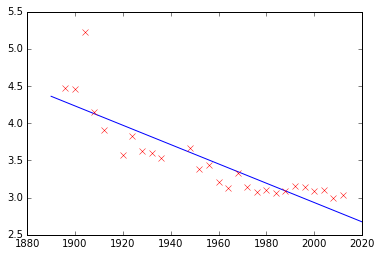

In [25]:
m = w[1]; c=w[0]
f_test = m*x_test + c
print(m)
print(c)
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

### Multivariate Linear Regression

A major advantage of the new system is that we can build a linear regression on a multivariate system. The matrix calculus didn't specify what the length of the vector $\mathbf{x}$ should be, or equivalently the size of the design matrix.

### Movie Body Count Data

Let's load back in the movie body count data.

In [26]:
data = pods.datasets.movie_body_count()
movies = data['Y']

Let's remind ourselves of the features we've been provided with.

In [27]:
print(', '.join(movies.columns))

Film, Year, Body_Count, MPAA_Rating, Genre, Director, Actors, Length_Minutes, IMDB_Rating


Now we will build a design matrix based on the numeric features: year, Body_Count, Length_Minutes in an effort to predict the rating. We build the design matrix as follows:

### Relation to Single Input System

Bias as an additional feature:

In [28]:
select_features = ['Year', 'Body_Count', 'Length_Minutes']
X = movies[select_features]
X['Eins'] = 1 # add a column for the offset
y = movies[['IMDB_Rating']]

C:\Users\Brian\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Now let's perform a linear regression. But this time, we will create a pandas data frame for the result so we can store it in a form that we can visualise easily.

In [29]:
import pandas as pd

w = pd.DataFrame(data=np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y)),  # solve linear regression here
                 index = X.columns,  # columns of X become rows of w
                 columns=['regression_coefficient'])  # the column of X is the value of regression coefficient

We can check the residuals to see how good our estimates are.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A00C2B0>]], dtype=object)

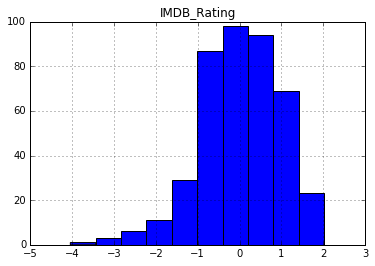

In [30]:
(y - np.dot(X, w)).hist()

Which shows our model *hasn't* yet done a great job of representation, because the spread of values is large. We can check what the rating is dominated by in terms of regression coefficients.

In [31]:
w

,regression_coefficient
Year,-0.016280
Body_Count,-0.000995
Length_Minutes,0.025386
Eins,36.508363


Although we have to be a little careful about interpretation because our input values live on different scales, however it looks like we are dominated by the bias, with a small negative effect for later films (but bear in mind the years are large, so this effect is probably larger than it looks) and a positive effect for length. So it looks like long earlier films generally do better, but the residuals are so high that we probably haven't modelled the system very well.

### Solution with QR Decomposition

Performing a `solve` instead of a matrix inverse is the more numerically stable approach, but we can do even better. A [QR-decomposition](http://en.wikipedia.org/wiki/QR_decomposition) of a matrix factorises it into a matrix which is an orthogonal matrix $\mathbf{Q}$, so that $\mathbf{Q}^\top \mathbf{Q} = \mathbf{I}$. And a matrix which is upper triangular, $\mathbf{R}$. 
\begin{align*}
  \mathbf{X}^\top \mathbf{X} \boldsymbol{\beta} & = \mathbf{X}^\top \mathbf{y} \\
  (\mathbf{Q}\mathbf{R})^\top (\mathbf{Q}\mathbf{R}) \boldsymbol{\beta} & = (\mathbf{Q}\mathbf{R})^\top \mathbf{y} \\
  \mathbf{R}^\top (\mathbf{Q}^\top \mathbf{Q}) \mathbf{R} \boldsymbol{\beta} & = \mathbf{R}^\top \mathbf{Q}^\top \mathbf{y} \\
  \mathbf{R}^\top \mathbf{R} \boldsymbol{\beta} & = \mathbf{R}^\top \mathbf{Q}^\top \mathbf{y} \\
  \mathbf{R} \boldsymbol{\beta} & = \mathbf{Q}^\top \mathbf{y}
\end{align*}
This is a more numerically stable solution because it removes the need to compute $\mathbf{X}^\top \mathbf{X}$ as an intermediate. Computing $\mathbf{X}^\top \mathbf{X}$ is a bad idea because it involves squaring all the elements of $\mathbf{X}$ and thereby potentially reducing the numerical precision with which we can represent the solution. Operating on $\mathbf{X}$ directly preserves the numerical precision of the model.

This can be more particularly seen when we begin to work with *basis functions* in the next session. Some systems that can be resolved with the QR decomposition can not be resolved by using solve directly.

In [32]:
import scipy as sp

Q, R = np.linalg.qr(X)
w = sp.linalg.solve_triangular(R, np.dot(Q.T, y))
w = pd.DataFrame(w, index=X.columns)
w

,0
Year,-0.016280
Body_Count,-0.000995
Length_Minutes,0.025386
Eins,36.508363


### Lectures by Neil Lawrence

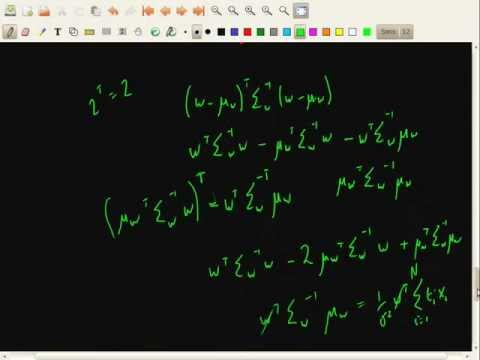

In [33]:
from IPython.display import YouTubeVideo
YouTubeVideo('ui-uNlFHoms')

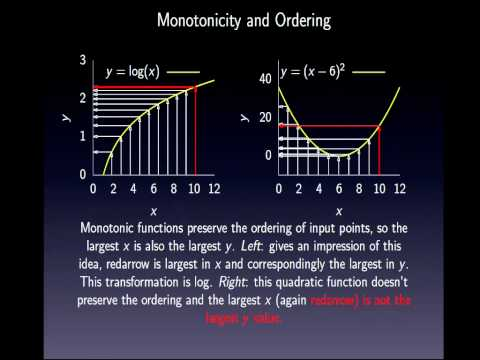

In [34]:
from IPython.display import YouTubeVideo
YouTubeVideo('78YNphT90-k')